# This notebook analyses and visualises the performance of the Vidgen et al. (2021) and three RHS models by comparing the ground truth to predicted labels at dataset, gold label and target word level for the three models. A correlation matrix is also produced to analyse the co-occurence of the target words.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Notebook_12_TESTSET_Comparison_Vidgen_RHS_Models.csv')

In [ ]:
df['gold_label'].value_counts(normalize = True) * 100

DEG           58.251280
NDG           33.556518
APR            7.050020
HOM            0.472627
CMP            0.275699
APR_negimp     0.275699
APR_negexp     0.118157
Name: gold_label, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score

# Grouping the data by "gold_label" and calculating accuracy for both models
accuracy_results = []

for label, group in df.groupby('gold_label'):
    true_labels = group['hate_label']
    rhs_nocv_accuracy = accuracy_score(true_labels, group['RHS Model (No Cross_Validation)']) * 100  # Convert to percentage
    vidgen_accuracy = accuracy_score(true_labels, group['Vidgen Model Prediction']) * 100  # Convert to percentage
    accuracy_results.append((label, rhs_nocv_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_df = pd.DataFrame(accuracy_results, columns=['Gold Label', 'RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

accuracy_df

,Gold Label,RHS Model (No Cross_Validation),Vidgen Model
0,APR,88.268156,17.877095
6,NDG,86.971831,46.596244
4,DEG,86.544963,95.537525
3,CMP,85.714286,28.571429
1,APR_negexp,66.666667,33.333333
5,HOM,25.000000,8.333333
2,APR_negimp,0.000000,0.000000


# Comparison of RHS Model (No Cross-Validation) with Vidgen Model

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
import plotly.express as px

# Your DataFrame and code to calculate accuracy_results

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_df.melt(id_vars='Gold Label', value_vars=['RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['#76B0B2', '#D5DF7F']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Gold Label', y='value',
             color='variable', barmode='group',
             title='Comparison of Model Accuracies Grouped by Gold Label',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white',  # Background color set to white
    legend=dict(orientation='h', yanchor='bottom', y=-0.4, xanchor='center', x=0.5)
)

# Showing the figure
fig.show()


In [ ]:
accuracy_df

,Gold Label,RHS Model (No Cross_Validation),Vidgen Model
0,APR,88.268156,17.877095
6,NDG,86.971831,46.596244
4,DEG,86.544963,95.537525
3,CMP,85.714286,28.571429
1,APR_negexp,66.666667,33.333333
5,HOM,25.000000,8.333333
2,APR_negimp,0.000000,0.000000


In [ ]:
from sklearn.metrics import accuracy_score

# Grouping the data by "gold_label" and calculating accuracy for both models
accuracy_results = []

for label, group in df.groupby('dataset'):
    true_labels = group['hate_label']
    rhs_accuracy = accuracy_score(true_labels, group['RHS Model (No Cross_Validation)']) * 100  # Convert to percentage
    vidgen_accuracy = accuracy_score(true_labels, group['Vidgen Model Prediction']) * 100  # Convert to percentage
    accuracy_results.append((label, rhs_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_df = pd.DataFrame(accuracy_results, columns=['Dataset', 'RHS Model (No Cross_Validation)', 'Vidgen Model'])
from sklearn.metrics import accuracy_score
import pandas as pd
import plotly.express as px

# Renaming the x-axis categories
dataset_mapping = {
    "drag_transcript": "Drag Race Transcript",
    "kurrek": "Kurrek et al. (2020)",
    "kaggle": "Samoshyn (2020)",
    "synth": "Synthetic"
}

accuracy_df['Dataset'] = accuracy_df['Dataset'].map(dataset_mapping)

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

import plotly.express as px

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_df.melt(id_vars='Dataset', value_vars=['RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['#76B0B2','#D5DF7F']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Dataset', y='value',
             color='variable', barmode='group',
             title='Comparison of Model Accuracies Grouped by Dataset',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white',  # Background color set to white
    legend=dict(orientation='h', yanchor='bottom', y=-0.4, xanchor='center', x=0.5)
    )
# Set y-axis limits to go up to 100
fig.update_yaxes(range=[0, 100])

# Showing the figure
fig.show()

In [ ]:
accuracy_df

,Dataset,RHS Model (No Cross_Validation),Vidgen Model
0,Drag Race Transcript,93.877551,14.965986
2,Kurrek et al. (2020),87.837838,76.226226
1,Samoshyn (2020),76.280323,78.167116
3,Synthetic,60.869565,47.826087


In [ ]:
# Initialize a list to store the results
accuracy_results = []

# Iterate through the specific columns (from index 5 to 18)
for column in df.columns[4:17]:
    # Filter the dataframe based on the current binary column being 1
    sub_df = df[df[column] == 1]

    # Calculate accuracy for RHS Model Prediction
    rhs_accuracy = accuracy_score(sub_df['hate_label'], sub_df['RHS Model (No Cross_Validation)'])

    # Calculate accuracy for Vidgen Model Prediction
    vidgen_accuracy = accuracy_score(sub_df['hate_label'], sub_df['Vidgen Model Prediction'])

    # Append the results
    accuracy_results.append((column, rhs_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_comparison_df = pd.DataFrame(accuracy_results, columns=['Target Word', 'RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_comparison_df = accuracy_comparison_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

# Convert accuracy to percentages
accuracy_comparison_df['RHS Model (No Cross_Validation)'] *= 100
accuracy_comparison_df['Vidgen Model'] *= 100

# Display the results
accuracy_comparison_df


,Target Word,RHS Model (No Cross_Validation),Vidgen Model
7,queen,100.000000,46.666667
5,other,98.275862,17.241379
1,drag,96.774194,25.806452
12,whore,92.592593,62.962963
4,homo,90.588235,58.823529
3,gay,90.416667,58.333333
2,fag,87.481875,76.220396
9,sissy,85.714286,85.714286
0,bitch,79.452055,69.315068
8,queer,77.419355,58.064516


In [ ]:
# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_comparison_df.melt(id_vars='Target Word', value_vars=['RHS Model (No Cross_Validation)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['#76B0B2','#D5DF7F']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Target Word', y='value',
             color='variable', barmode='group',
             title='Comparison of Model Accuracies at Target Word Level',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white',  # Background color set to white
    yaxis_title="Accuracy (%)",  # Updated y-axis title
    legend=dict(orientation='h', yanchor='bottom', y=-0.4, xanchor='center', x=0.5)
)

# Showing the figure
fig.show()


# Comparison of all RHS Models with Vidgen Model

In [ ]:
from sklearn.metrics import accuracy_score

# Grouping the data by "gold_label" and calculating accuracy for both models
accuracy_results = []

for label, group in df.groupby('gold_label'):
    true_labels = group['hate_label']
    rhs_nocv_accuracy = accuracy_score(true_labels, group['RHS Model (No Cross_Validation)']) * 100  # Convert to percentage
    rhs_bestfold_accuracy = accuracy_score(true_labels, group['RHS Model (Best Fold)']) * 100  # Convert to percentage
    rhs_avweights_accuracy = accuracy_score(true_labels, group['RHS Model (Averaged Weights)']) * 100  # Convert to percentage
    vidgen_accuracy = accuracy_score(true_labels, group['Vidgen Model Prediction']) * 100  # Convert to percentage
    accuracy_results.append((label, rhs_nocv_accuracy, rhs_bestfold_accuracy, rhs_avweights_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_df = pd.DataFrame(accuracy_results, columns=['Gold Label', 'RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)','RHS Model (Averaged Weights)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

accuracy_df

,Gold Label,RHS Model (No Cross_Validation),RHS Model (Best Fold),RHS Model (Averaged Weights),Vidgen Model
0,APR,88.268156,91.061453,89.385475,17.877095
6,NDG,86.971831,84.741784,86.737089,46.596244
4,DEG,86.544963,89.587559,86.409736,95.537525
3,CMP,85.714286,85.714286,85.714286,28.571429
1,APR_negexp,66.666667,66.666667,33.333333,33.333333
5,HOM,25.000000,66.666667,58.333333,8.333333
2,APR_negimp,0.000000,100.000000,0.000000,0.000000


In [ ]:
import plotly.express as px

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_df.melt(id_vars='Gold Label', value_vars=['RHS Model (No Cross_Validation)','RHS Model (Best Fold)','RHS Model (Averaged Weights)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['#76B0B2','#D5DF7F', 'rgb(255,217,47)', 'rgb(299,146,148)']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Gold Label', y='value',
             color='variable', barmode='group',
             title='Comparison of All Model Accuracies Grouped by Gold Label',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white'  # Background color set to white
)

# Showing the figure
fig.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Grouping the data by "dataset" and calculating accuracy for both models
accuracy_results = []

for label, group in df.groupby('dataset'):
    true_labels = group['hate_label']
    rhs_nocv_accuracy = accuracy_score(true_labels, group['RHS Model (No Cross_Validation)']) * 100  # Convert to percentage
    rhs_bestfold_accuracy = accuracy_score(true_labels, group['RHS Model (Best Fold)']) * 100  # Convert to percentage
    rhs_avweights_accuracy = accuracy_score(true_labels, group['RHS Model (Averaged Weights)']) * 100  # Convert to percentage
    vidgen_accuracy = accuracy_score(true_labels, group['Vidgen Model Prediction']) * 100  # Convert to percentage
    accuracy_results.append((label, rhs_nocv_accuracy, rhs_bestfold_accuracy, rhs_avweights_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_df = pd.DataFrame(accuracy_results, columns=['Dataset', 'RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)','RHS Model (Averaged Weights)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_df = accuracy_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

# Renaming the x-axis categories
dataset_mapping = {
    "drag_transcript": "Drag Race Transcript",
    "kurrek": "Kurrek et al. (2020)",
    "kaggle": "Samoshyn (2020)",
    "synth": "Synthetic"
}

accuracy_df['Dataset'] = accuracy_df['Dataset'].map(dataset_mapping)

accuracy_df

,Dataset,RHS Model (No Cross_Validation),RHS Model (Best Fold),RHS Model (Averaged Weights),Vidgen Model
0,Drag Race Transcript,93.877551,98.639456,97.959184,14.965986
2,Kurrek et al. (2020),87.837838,88.938939,87.537538,76.226226
1,Samoshyn (2020),76.280323,77.897574,76.819407,78.167116
3,Synthetic,60.869565,95.652174,56.521739,47.826087


In [ ]:
import plotly.express as px

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_df.melt(id_vars='Dataset', value_vars=['RHS Model (No Cross_Validation)','RHS Model (Best Fold)','RHS Model (Averaged Weights)', 'Vidgen Model'])

# Custom color scale for the two groups
color_scale = ['#76B0B2','#D5DF7F', 'rgb(255,217,47)', 'rgb(299,146,148)']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Dataset', y='value',
             color='variable', barmode='group',
             title='Comparison of All Model Accuracies Grouped by Dataset',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white'  # Background color set to white
)

# Showing the figure
fig.show()

In [ ]:
# Initialize a list to store the results
accuracy_results = []

# Iterate through the specific columns (from index 5 to 18)
for column in df.columns[4:17]:
    # Filter the dataframe based on the current binary column being 1
    sub_df = df[df[column] == 1]

    # Calculate accuracy for RHS Model (No Cross_Validation)
    rhs_no_cv_accuracy = accuracy_score(sub_df['hate_label'], sub_df['RHS Model (No Cross_Validation)'])

    # Calculate accuracy for RHS Model (Best Fold)
    rhs_best_fold_accuracy = accuracy_score(sub_df['hate_label'], sub_df['RHS Model (Best Fold)'])

    # Calculate accuracy for RHS Model (Averaged Weights)
    rhs_avg_weights_accuracy = accuracy_score(sub_df['hate_label'], sub_df['RHS Model (Averaged Weights)'])

    # Calculate accuracy for Vidgen Model Prediction
    vidgen_accuracy = accuracy_score(sub_df['hate_label'], sub_df['Vidgen Model Prediction'])

    # Append the results
    accuracy_results.append((column, rhs_no_cv_accuracy, rhs_best_fold_accuracy, rhs_avg_weights_accuracy, vidgen_accuracy))

# Converting the results into a DataFrame for easier visualization
accuracy_comparison_df = pd.DataFrame(accuracy_results, columns=['Target Word', 'RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)', 'RHS Model (Averaged Weights)', 'Vidgen Model'])

# Sorting the DataFrame by RHS Model Accuracy in descending order
accuracy_comparison_df = accuracy_comparison_df.sort_values(by='RHS Model (No Cross_Validation)', ascending=False)

# Convert accuracy to percentages
accuracy_comparison_df[['RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)', 'RHS Model (Averaged Weights)', 'Vidgen Model']] *= 100

# Display the results
accuracy_comparison_df



,Target Word,RHS Model (No Cross_Validation),RHS Model (Best Fold),RHS Model (Averaged Weights),Vidgen Model
7,queen,100.000000,100.000000,100.000000,46.666667
5,other,98.275862,100.000000,100.000000,17.241379
1,drag,96.774194,96.774194,96.774194,25.806452
12,whore,92.592593,88.888889,92.592593,62.962963
4,homo,90.588235,91.764706,90.588235,58.823529
3,gay,90.416667,90.000000,87.916667,58.333333
2,fag,87.481875,88.883519,87.191880,76.220396
9,sissy,85.714286,85.714286,85.714286,85.714286
0,bitch,79.452055,81.917808,80.273973,69.315068
8,queer,77.419355,80.645161,77.419355,58.064516


In [ ]:

# Melting the DataFrame for Plotly
melted_accuracy_df = accuracy_comparison_df.melt(id_vars='Target Word', value_vars=['RHS Model (No Cross_Validation)', 'RHS Model (Best Fold)', 'RHS Model (Averaged Weights)', 'Vidgen Model'])

# Custom color scale for the four groups
color_scale = ['#76B0B2','#D5DF7F', 'rgb(255,217,47)', 'rgb(299,146,148)']

# Creating a grouped bar chart
fig = px.bar(melted_accuracy_df, x='Target Word', y='value',
             color='variable', barmode='group',
             title='Comparison of Model Accuracies at Target Word Level',
             labels={'value': 'Accuracy (%)', 'variable': 'Model'},  # Updated y-axis label
             color_discrete_sequence=color_scale)

# Update layout to set font size, center the title, and set the background color to white
fig.update_layout(
    font=dict(size=18),
    title=dict(x=0.5),
    plot_bgcolor='white',  # Background color set to white
    yaxis_title="Accuracy (%)"  # Updated y-axis title
)

# Showing the figure
fig.show()

In [ ]:
selected_columns = ['bitch', 'drag', 'fag', 'gay', 'homo', 'other', 'puss', 'queen',
       'queer', 'sissy', 'slay', 'slut', 'whore']

# Calculate the correlation matrix for selected columns
correlation_matrix = df[selected_columns].corr(method='pearson')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

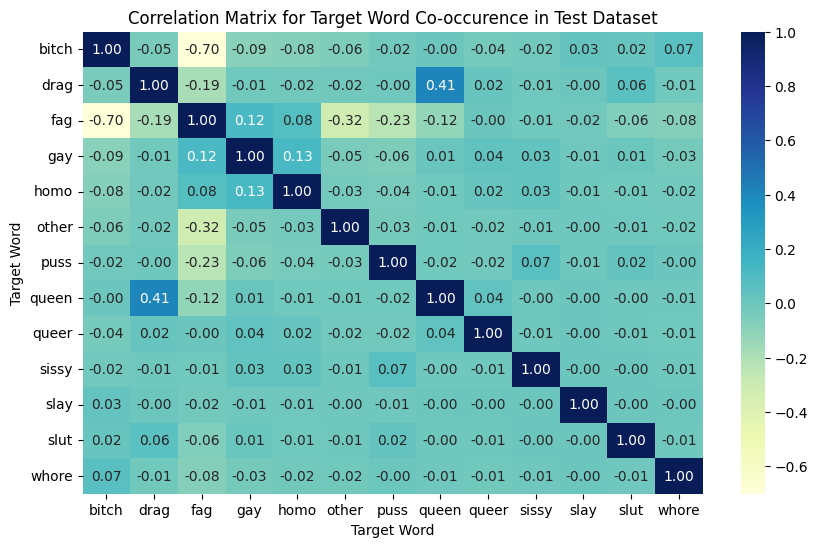

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Correlation Matrix for Target Word Co-occurence in Test Dataset')
plt.xlabel('Target Word')
plt.ylabel('Target Word')
plt.show()